In [1]:
import matplotlib.pyplot as plt

from models import TransformerModelLooped, TransformerModelLoopedLastNTokens
from curriculum import CurriculumSimple
from train import train_without_config, validate_model

n_dims = 10

In [2]:
model_loop_b5 = TransformerModelLoopedLastNTokens(
    n_dims=n_dims,
    n_positions=101,
    n_embd=256,
    n_layer=1,
    n_head=4,
    pred_type="regression",
    n=None
).cuda()

cirriculum_b5  = CurriculumSimple(n_dims, 31, 5, [5000, n_dims, 0], [5000, 31, 0], [5000, 5, 0])

metrics_l1_b5  = train_without_config(
    model_loop_b5, cirriculum_b5,
    model_n_dims=n_dims, log_every_steps=10, train_steps=15000, family="gpt2_loop", do_wandb_log=False)

number of parameters: 0.79M


  0%|          | 0/15000 [00:00<?, ?it/s]C:\Users\Vadim_K\DataspellProjects\looped_transformer\scripts\nano_gpt.py:79: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  y = torch.nn.functional.scaled_dot_product_attention(


0


loss 3.7078871726989746: 100%|██████████| 15000/15000 [13:53<00:00, 18.00it/s]


In [3]:
model_loop_b10 = TransformerModelLoopedLastNTokens(
    n_dims=n_dims,
    n_positions=101,
    n_embd=256,
    n_layer=1,
    n_head=4,
    pred_type="regression",
    n=None
).cuda()

cirriculum_b10  = CurriculumSimple(n_dims, 31, 10, [5000, n_dims, 0], [5000, 31, 0], [5000, 10, 0])

metrics_l1_b10  = train_without_config(
    model_loop_b10, cirriculum_b10,
    model_n_dims=n_dims, log_every_steps=10, train_steps=15000, family="gpt2_loop", do_wandb_log=False)

number of parameters: 0.79M


loss 10.170994758605957:   0%|          | 1/15000 [00:00<31:58,  7.82it/s]

0


loss 2.7635741233825684: 100%|██████████| 15000/15000 [28:01<00:00,  8.92it/s]


In [7]:
model_loop_b15 = TransformerModelLoopedLastNTokens(
    n_dims=n_dims,
    n_positions=101,
    n_embd=256,
    n_layer=1,
    n_head=4,
    pred_type="regression",
    n=None
).cuda()

cirriculum_b15  = CurriculumSimple(n_dims, 31, 15, [5000, n_dims, 0], [5000, 31, 0], [5000, 15, 0])

metrics_l1_b15  = train_without_config(
    model_loop_b15, cirriculum_b15,
    model_n_dims=n_dims, log_every_steps=10, train_steps=15000, family="gpt2_loop", do_wandb_log=False)

number of parameters: 0.79M


  0%|          | 0/15000 [00:00<?, ?it/s]

0


loss 3.096709728240967:  47%|████▋     | 7088/15000 [21:59<24:32,  5.37it/s]  


KeyboardInterrupt: 

In [12]:
def calculate_by_loop(model):
    val_by_loop = []
    loop_steps = []
    model.eval()
    for i in range(1, 60):
        val_loss = validate_model(model, n_dims_truncated=10, n_loops=i, model_n_dims=10, n_points=31, family="gpt2_loop")
        val_by_loop.append(val_loss / n_dims)
        loop_steps.append(i)
    return loop_steps, val_by_loop 

steps_b5, values_b5 = calculate_by_loop(model_loop_b5)

In [5]:
def calculate_by_n_points(model, max_n_points, n_loops=5):
    vals = []
    loop_steps = []
    model.eval()
    for i in range(1, max_n_points):
        model.n = i
        val_loss = validate_model(model, n_dims_truncated=10, n_loops=n_loops, model_n_dims=10, n_points=31, family="gpt2_loop")
        vals.append(val_loss / n_dims)
        loop_steps.append(i)
    return loop_steps, vals

steps_points_b5, values_points_b5 = calculate_by_n_points(model_loop_b5, max_n_points=31, n_loops=5)
steps_points_b10, values_points_b10 = calculate_by_n_points(model_loop_b10, max_n_points=31, n_loops=5)

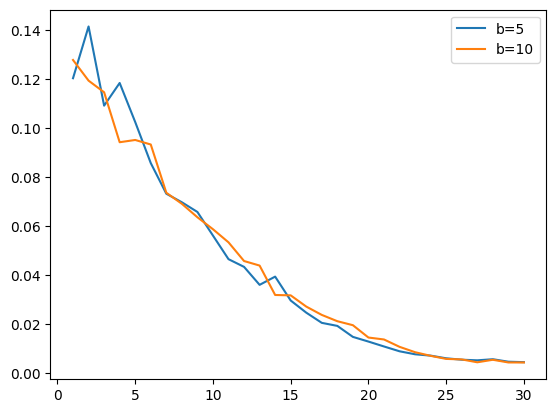

In [8]:
plt.plot(steps_points_b5, values_points_b5)
plt.plot(steps_points_b10, values_points_b10 )
plt.legend(["b=5", "b=10"])
plt.savefig('../images/check_last_n_tokens_quality.png')